In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [221]:
df = pd.read_csv('./data/train.csv')

In [222]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [223]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [224]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [225]:
df.Age.isna().sum(),df.Embarked.isna().sum(),df.Cabin.isna().sum()

(177, 2, 687)

# Age

<Figure size 1440x504 with 0 Axes>

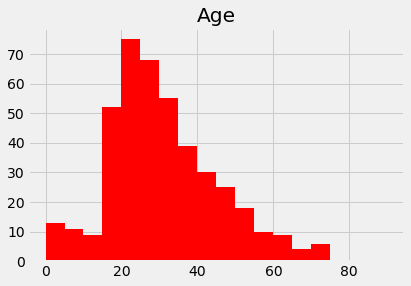

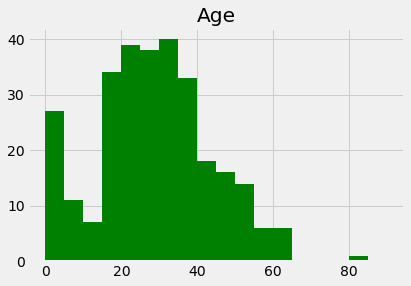

<Figure size 1440x504 with 0 Axes>

In [226]:
df[df['Survived']== 0].hist(column='Age',color='red',
                            bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
df[df['Survived']== 1].hist(column='Age',color='green',
                            bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
plt.figure(figsize=(20,7))

In [234]:
df['Age'].isnull().sum()

177

In [269]:
df_t1 = df[df['Pclass']==1].groupby('title')['Age'].agg(['mean','median'])
df_t1.head(3)
df_t2= df[df['Pclass']==2].groupby('title')['Age'].agg(['mean','median'])
df_t2.head(3)
df_t3 = df[df['Pclass']==3].groupby('title')['Age'].agg(['mean','median'])
df_t3.head(3)

,mean,median
title,,
Master,5.350833,4.0
Miss,16.123188,18.0
Mr,28.724891,26.0


In [272]:
df_t1['mean_2'] = df_t2['mean']
df_t1['mean_3'] = df_t3['mean']
df_t1.head(3)

,mean,median,mean_2,mean_3
title,,,,
Capt,70.0,70.0,NaN,NaN
Col,58.0,58.0,NaN,NaN
Don,40.0,40.0,NaN,NaN


In [280]:
# df_t1 = df_t1.drop('median',axis=1)
df_t1.columns = ['1','2','3']
df_t1.head(3)

,1,2,3
title,,,
Capt,70.0,NaN,NaN
Col,58.0,NaN,NaN
Don,40.0,NaN,NaN


In [281]:
df_t1.head(19)

,1,2,3
title,,,
Capt,70.000000,NaN,NaN
Col,58.000000,NaN,NaN
Don,40.000000,NaN,NaN
Dr,43.750000,38.500000,NaN
Jonkheer,38.000000,NaN,NaN
Lady,48.000000,NaN,NaN
Major,48.500000,NaN,NaN
Master,5.306667,2.258889,5.350833
Miss,30.000000,22.390625,16.123188


In [282]:
df_t = df.groupby('title')['Age'].agg(['mean','median'])
df_t.head(3)
df_t.columns
lst1 = df_t.index
lst2 = df_t['mean']

In [283]:
di = dict(zip(lst1,lst2))
di

{' Capt': 70.0,
 ' Col': 58.0,
 ' Don': 40.0,
 ' Dr': 42.0,
 ' Jonkheer': 38.0,
 ' Lady': 48.0,
 ' Major': 48.5,
 ' Master': 4.574166666666667,
 ' Miss': 21.773972602739725,
 ' Mlle': 24.0,
 ' Mme': 24.0,
 ' Mr': 32.368090452261306,
 ' Mrs': 35.898148148148145,
 ' Ms': 28.0,
 ' Rev': 43.166666666666664,
 ' Sir': 49.0,
 ' the Countess': 33.0}

In [284]:
mask = df.Age.isnull()

In [285]:
df.loc[mask, 'Age'] = df.loc[mask, 'title'].map(di)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [287]:
df['Age'].isnull().sum()

0

<Figure size 1440x504 with 0 Axes>

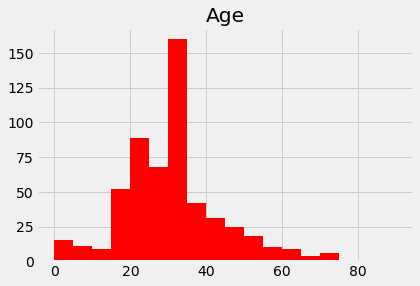

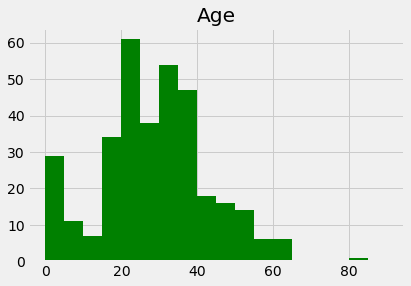

<Figure size 1440x504 with 0 Axes>

In [288]:
df[df['Survived']== 0].hist(column='Age',color='red',
                            bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
df[df['Survived']== 1].hist(column='Age',color='green',
                            bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
plt.figure(figsize=(20,7))

# Name

In [227]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [228]:
df['surname'] = df['Name'].apply(lambda x: x.split(',')[0])
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen


In [229]:
df['title']=df['Name'].apply(lambda x: x.split('.')[0].split(',')[1])
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [230]:
df['title'].nunique(),df['surname'].nunique()

(17, 667)

In [231]:
df['title'].isnull().any(),df['surname'].isnull().any()

(False, False)

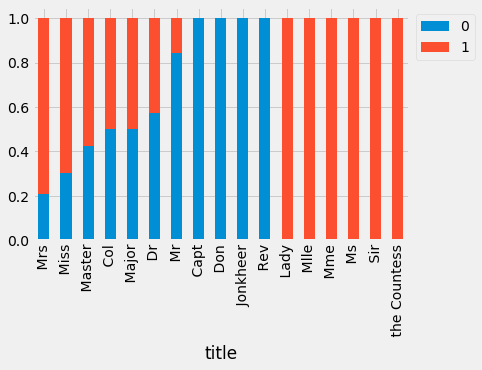

In [232]:
df11 = df.groupby("title")['Survived'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True',legend=False)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [233]:
df.groupby('title').title.count()

title
 Capt              1
 Col               2
 Don               1
 Dr                7
 Jonkheer          1
 Lady              1
 Major             2
 Master           40
 Miss            182
 Mlle              2
 Mme               1
 Mr              517
 Mrs             125
 Ms                1
 Rev               6
 Sir               1
 the Countess      1
Name: title, dtype: int64

In [188]:
df['surname'].nunique(),df['surname'].count()

(667, 891)

#  Ticket

In [289]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [290]:
df['Ticket_1'] = df['Ticket'].apply(lambda x: x.split(' ')[-1])
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,3101282


In [291]:
df['Ticket_1'] = pd.to_numeric(df['Ticket_1'],errors='coerce')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,3101282.0


In [306]:
df['Ticket_1'].isna().sum()

4

In [307]:
print(df[df['Ticket_1'].isnull()])

     PassengerId  Survived  Pclass                             Name   Sex  \
179          180         0       3              Leonard, Mr. Lionel  male   
271          272         1       3     Tornquist, Mr. William Henry  male   
302          303         0       3  Johnson, Mr. William Cahoone Jr  male   
597          598         0       3              Johnson, Mr. Alfred  male   

      Age  SibSp  Parch Ticket  Fare Cabin Embarked    surname title  Ticket_1  
179  36.0      0      0   LINE   0.0   NaN        S    Leonard    Mr       NaN  
271  25.0      0      0   LINE   0.0   NaN        S  Tornquist    Mr       NaN  
302  19.0      0      0   LINE   0.0   NaN        S    Johnson    Mr       NaN  
597  49.0      0      0   LINE   0.0   NaN        S    Johnson    Mr       NaN  


In [308]:
df.loc[[179,271,302,597]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Leonard,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Tornquist,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Johnson,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Johnson,Mr,NaN


In [300]:
df['Ticket_1'].value_counts().argmax(),df['Ticket_1'].value_counts().sort_values(ascending=False)

/opt/anaconda3/envs/ftds6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


(1601.0, 1601.0       7
 2343.0       7
 347082.0     7
 2144.0       6
 3101295.0    6
             ..
 2650.0       1
 3460.0       1
 113804.0     1
 3101310.0    1
 244278.0     1
 Name: Ticket_1, Length: 678, dtype: int64)

In [311]:
df['Ticket_1'] = df['Ticket_1'].fillna(1601)
df['Ticket_1'].isna().sum()

0

In [314]:
df['Embarked'].isnull().sum()

2

#  Fare/Cabin

#  Embarked

# Pclass

In [8]:
dft = pd.read_csv('./data/test.csv')
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
dft['Ticket'].nunique()

363

In [11]:
dft.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [23]:
dft.Age.isna().sum(),dft.Fare.isna().sum(),dft.Cabin.isna().sum()

(86, 1, 327)

In [26]:
df1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [35]:
# df1['Ticket_1'] = df1['Ticket'].apply(lambda x: x.split(' ')[-1])

In [31]:
df1.Ticket_1.nunique()

679

In [45]:
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282


In [46]:
df1.Age.isna().sum(),df1.Embarked.isna().sum(),df1.Cabin.isna().sum()

(177, 2, 687)

In [47]:
print(df1[df1['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked Ticket_1  
61   female  38.0      0      0  113572  80.0   B28      NaN   113572  
829  female  62.0      0      0  113572  80.0   B28      NaN   113572  


In [50]:
# df1['Surname'] = df1['Name'].apply(lambda x: x.split(',')[0])
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_1,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,Heikkinen


In [54]:
print(df1[df1['Cabin'] == 'B28'])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked Ticket_1 Surname  
61   female  38.0      0      0  113572  80.0   B28      NaN   113572   Icard  
829  female  62.0      0      0  113572  80.0   B28      NaN   113572   Stone  


In [59]:
df1['Cabin'].nunique(),df1['Embarked'].nunique(),df1['Surname'].nunique()

(147, 3, 667)

In [61]:
df2 = df1.drop(['Ticket','Name','Surname','Cabin','Age'],axis=1)
df2.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Ticket_1
0,1,0,3,male,1,0,7.2500,S,21171
1,2,1,1,female,1,0,71.2833,C,17599
2,3,1,3,female,0,0,7.9250,S,3101282


In [64]:
df2['Sex'] = df2['Sex'].apply(lambda x: 1 if x =='male' else 0)
df2.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Ticket_1
0,1,0,3,1,1,0,7.2500,S,21171
1,2,1,1,0,1,0,71.2833,C,17599
2,3,1,3,0,0,0,7.9250,S,3101282


In [65]:
df2.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Ticket_1
Embarked,,,,,,,,
C,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644


In [66]:
df2 = pd.concat([df2,pd.get_dummies(df2['Embarked'], prefix='Embarked')],axis=1)
df2


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Ticket_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,1,0,7.2500,S,21171,0,0,1
1,2,1,1,0,1,0,71.2833,C,17599,1,0,0
2,3,1,3,0,0,0,7.9250,S,3101282,0,0,1
3,4,1,1,0,1,0,53.1000,S,113803,0,0,1
4,5,0,3,1,0,0,8.0500,S,373450,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.0000,S,211536,0,0,1
887,888,1,1,0,0,0,30.0000,S,112053,0,0,1
888,889,0,3,0,1,2,23.4500,S,6607,0,0,1
889,890,1,1,1,0,0,30.0000,C,111369,1,0,0


In [67]:
# now drop the original column (you don't need it anymore)
df2.drop(['Embarked'],axis=1, inplace=True)
df2

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Ticket_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,1,0,7.2500,21171,0,0,1
1,2,1,1,0,1,0,71.2833,17599,1,0,0
2,3,1,3,0,0,0,7.9250,3101282,0,0,1
3,4,1,1,0,1,0,53.1000,113803,0,0,1
4,5,0,3,1,0,0,8.0500,373450,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.0000,211536,0,0,1
887,888,1,1,0,0,0,30.0000,112053,0,0,1
888,889,0,3,0,1,2,23.4500,6607,0,0,1
889,890,1,1,1,0,0,30.0000,111369,1,0,0


In [71]:
df2.loc[[179],7:8] = 0

In [79]:
df2['Ticket_1'] = df2['Ticket_1'].apply(lambda x: 0 if x == 'LINE' else x)
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Fare           float64
Ticket_1        object
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [81]:
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Fare           float64
Ticket_1         int64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [80]:
df2['Ticket_1'] = pd.to_numeric(df2['Ticket_1'])
df2

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Ticket_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,1,0,7.2500,21171,0,0,1
1,2,1,1,0,1,0,71.2833,17599,1,0,0
2,3,1,3,0,0,0,7.9250,3101282,0,0,1
3,4,1,1,0,1,0,53.1000,113803,0,0,1
4,5,0,3,1,0,0,8.0500,373450,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.0000,211536,0,0,1
887,888,1,1,0,0,0,30.0000,112053,0,0,1
888,889,0,3,0,1,2,23.4500,6607,0,0,1
889,890,1,1,1,0,0,30.0000,111369,1,0,0


In [82]:
df = df2.drop('PassengerId',axis=1)
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Ticket_1,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,21171,0,0,1
1,1,1,0,1,0,71.2833,17599,1,0,0
2,1,3,0,0,0,7.9250,3101282,0,0,1


#  Trainin 

In [83]:
# Separate out the target

X = df.drop('Survived',axis=1)
y = df['Survived']
X.head(3)

,Pclass,Sex,SibSp,Parch,Fare,Ticket_1,Embarked_C,Embarked_Q,Embarked_S
0,3,1,1,0,7.2500,21171,0,0,1
1,1,0,1,0,71.2833,17599,1,0,0
2,3,0,0,0,7.9250,3101282,0,0,1


In [84]:
y.shape, X.shape

((891,), (891, 9))

In [133]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.25,
                                     max_depth=20, random_state=42, max_leaf_nodes=50)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

In [172]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[139  33]
 [ 25  71]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       172
           1       0.68      0.74      0.71        96

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.78      0.79       268



In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[216   7]
 [ 78  56]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.97      0.84       223
           1       0.89      0.42      0.57       134

    accuracy                           0.76       357
   macro avg       0.81      0.69      0.70       357
weighted avg       0.79      0.76      0.74       357

